<div align="center">
    <h1><b><u>TRAFFIC OPTIMIZATION</u></b></h1>
</div>


**GROUP NUMBER: 7**
     
**GROUP MEMBERS**
   
- **Adebola**
- **Rahim**
- **Sayeed**
- **Yinka**
- **Minto**
   

<div align="center">
    <h3><b><u>2. Hypothesis Testing: Accidents in the Evening</u></b></h3>
</div>


#### **Null Hypothesis H<sub>0</sub>:**
The proportion of accidents in the evening is less than or equal to the proportion of accidents at other times of the day.

$ H_{0}: P_{Evening} \leq P_{OtherTimes} $


#### **Alternate Hypothesis H<sub>a</sub>:**
The proportion of accidents in the evening is greater than the proportion of accidents at other times of the day.

$ H_{A}: P_{Evening} > P_{OtherTimes} $

This is a **one-tailed hypothesis test**, we are testing if the proportion of accidents in the evening is greater than at other times.


In [3]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

#### **1. Data Import**

In [5]:
# Importing the Data
data=pd.read_csv('data/Motor_Vehicle_Collisions_with_KSI_Data_4326.csv')

# Viewing first 5 records
data.head()

,_id,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,ACCLOC,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,geometry
0,1,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31..."
1,2,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31..."
2,3,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31..."
3,4,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31..."
4,5,893184.0,2006-01-01,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31..."


#### **2. DATA PRE-PROCESSING**

- Create a new column called 'TimeOfDay' having two values : 'Daytime' and 'Evening'

In [6]:
# Convert TIME column to string and pad with zeros
data['TIME'] = data['TIME'].astype(str).str.zfill(4)

# Combine DATE and TIME to create a DATETIME column
data['DATETIME'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'], format='%Y-%m-%d %H%M')

# Extract hour from the DATETIME column
data['Hour'] = data['DATETIME'].dt.hour

# Create a new column 'TimeOfDay' based on the hour
data['TimeOfDay'] = data['Hour'].apply(lambda x: 'Daytime' if x < 17 else 'Evening')



In [7]:
data.head()

,_id,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,ACCLOC,...,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,geometry,DATETIME,Hour,TimeOfDay
0,1,893184.0,2006-01-01,0236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31...",2006-01-01 02:36:00,2,Daytime
1,2,893184.0,2006-01-01,0236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31...",2006-01-01 02:36:00,2,Daytime
2,3,893184.0,2006-01-01,0236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31...",2006-01-01 02:36:00,2,Daytime
3,4,893184.0,2006-01-01,0236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31...",2006-01-01 02:36:00,2,Daytime
4,5,893184.0,2006-01-01,0236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,Intersection Related,...,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'MultiPoint', 'coordinates': [[-79.31...",2006-01-01 02:36:00,2,Daytime


- Calculate the proportion of accidents that happen in the daytime.
- Calculate the proportion of accidents that happen in the evening.

In [8]:
# Count the number of "Evening" and "Daytime" occurrences
evening_accidents = data[data['TimeOfDay'] == 'Evening'].shape[0]
daytime_accidents = data[data['TimeOfDay'] == 'Daytime'].shape[0]
total_accidents = data.shape[0]

# Proportion of evening accidents
p_evening = evening_accidents / total_accidents

# Null hypothesis proportion (daytime accidents)
p_daytime = daytime_accidents / total_accidents


#### **3. VIZUALIZATIONS**

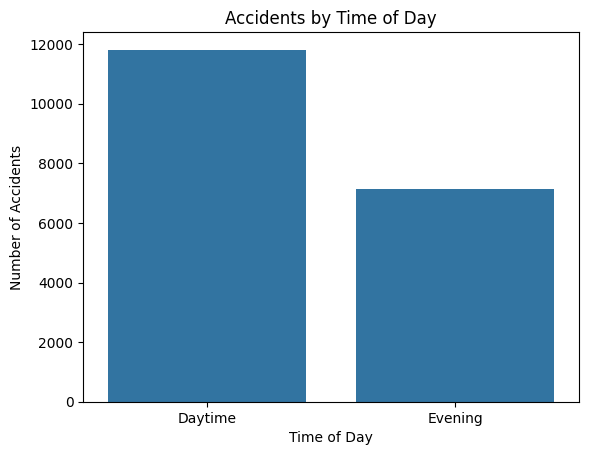

In [9]:
# Count plot for TimeOfDay
sns.countplot(x='TimeOfDay', data=data)
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


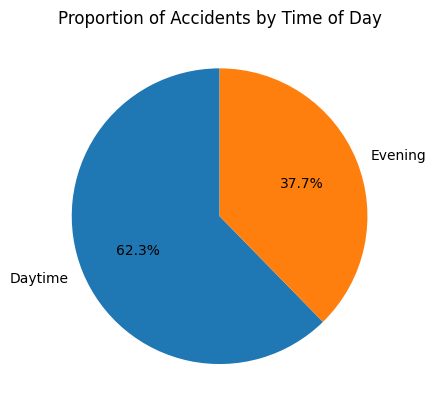

In [10]:
# Calculate proportions
proportions = data['TimeOfDay'].value_counts(normalize=True)

# Pie chart
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Accidents by Time of Day')
plt.show()

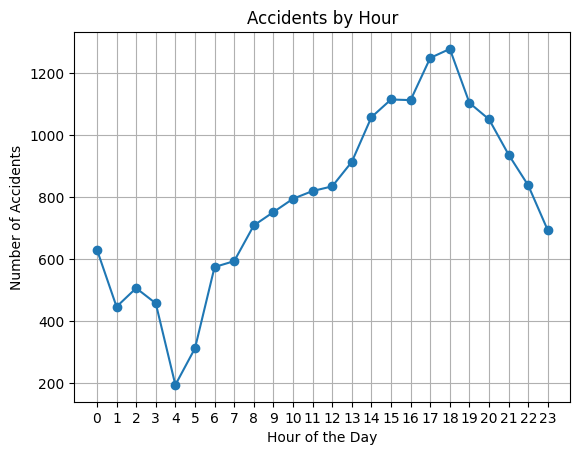

In [12]:
# Group data by Hour
accidents_by_hour = data.groupby('Hour').size()

# Line plot
plt.plot(accidents_by_hour.index, accidents_by_hour.values, marker='o')
plt.title('Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


#### **4. ONE TAIL Z-TEST**

- Perform one-tail z-test

In [13]:
# Step 2: Hypothesis testing
# H0: p_evening <= p_daytime, Ha: p_evening > p_daytime
count = np.array([evening_accidents, daytime_accidents])  # Counts of successes
nobs = total_accidents  # Total number of observations

# Perform one-tailed z-test
stat, p_value = proportions_ztest(count[0], nobs, value=p_daytime, alternative='larger')



- Use the test statistic and p-value to decide whether to reject or fail to reject the null hypothesis.

In [14]:
# Step 3: Significance level
alpha = 0.05  # 5% significance level

print("Test Statistic:", stat)
print("P-Value:", p_value)

if p_value < alpha:
    print('''Reject the null hypothesis.
    The proportion of accidents in the evening is less than or equal to the proportion of accidents at other times of the day is rejected.''')
else:
    print('''Fail to reject the null hypothesis.
    Failed to reject that the proportion of accidents in the evening is less than or equal to the proportion of accidents at other times of the day''')

Test Statistic: -70.00932074686195
P-Value: 1.0
Fail to reject the null hypothesis.
    Failed to reject that the proportion of accidents in the evening is less than or equal to the proportion of accidents at other times of the day


#### **5. RESULT**

- The p-value is less that the alpha.
- Hence, we fail to reject the null hypothesis.
- We fail to reject that the proportion of accidents in the evening is less than or equal to the proportion of accidents at other times of the day.

